In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("Mobile_project.csv")[["battery_power","ram","price_range"]]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df.head()

,battery_power,ram,price_range
0,842,2549,1
1,1021,2631,2
2,563,2603,2
3,615,2769,2
4,1821,1411,1


In [5]:
# df.drop(df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]],axis=1)

In [6]:
df

,battery_power,ram,price_range
0,842,2549,1
1,1021,2631,2
2,563,2603,2
3,615,2769,2
4,1821,1411,1
...,...,...,...
1995,794,668,0
1996,1965,2032,2
1997,1911,3057,3
1998,1512,869,0


In [7]:
# df.iloc[ : ,1:13]

In [8]:
# df.drop(df.iloc[ : ,1:13],axis=1,inplace=True)

In [9]:

df

,battery_power,ram,price_range
0,842,2549,1
1,1021,2631,2
2,563,2603,2
3,615,2769,2
4,1821,1411,1
...,...,...,...
1995,794,668,0
1996,1965,2032,2
1997,1911,3057,3
1998,1512,869,0


In [10]:
# df.iloc[ : ,2:8]

In [11]:
# df.drop(df.iloc[ : ,2:8],axis=1,inplace=True)

In [12]:
# df

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(["price_range"],axis=1),df["price_range"],test_size=0.3,random_state=42)

In [14]:
x_train

,battery_power,ram
836,902,3654
575,1197,2885
557,1519,2912
1235,1971,571
1360,882,751
...,...,...
1130,1975,3022
1294,589,362
860,1829,2080
1459,1927,2916


In [15]:
x_test

,battery_power,ram
1860,1646,686
353,1182,2563
1333,1972,1316
905,989,3892
1289,615,1906
...,...,...
148,1216,2268
1554,1957,1115
1956,555,343
925,1048,2146


In [16]:
y_train

836     3
575     2
557     2
1235    0
1360    0
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1400, dtype: int64

In [17]:
y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
148     2
1554    1
1956    0
925     1
942     0
Name: price_range, Length: 600, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [19]:
    ss=StandardScaler()
    ss.fit(x_train)

StandardScaler()

In [20]:
x_train_scalled=ss.transform(x_train)
x_test_scalled=ss.transform(x_test)

In [21]:
x_train_scalled=pd.DataFrame(x_train_scalled, columns=x_train.columns)
x_test_scalled=pd.DataFrame(x_test_scalled, columns=x_test.columns)

In [22]:
x_train_scalled

,battery_power,ram
0,-0.763895,1.414973
1,-0.097852,0.704443
2,0.629151,0.729390
3,1.649665,-1.433613
4,-0.809051,-1.267300
...,...,...
1395,1.658696,0.831027
1396,-1.470578,-1.626722
1397,1.329061,-0.039349
1398,1.550323,0.733086


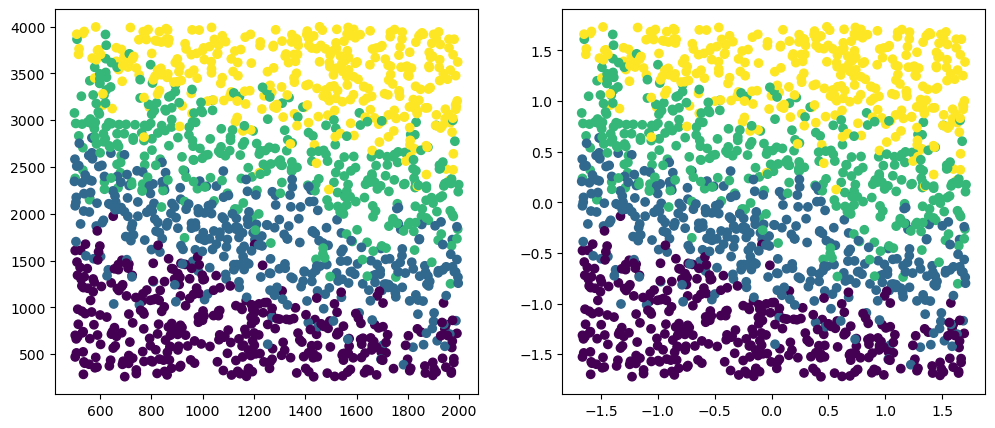

In [23]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))

a1.scatter(x_train["battery_power"],x_train["ram"],c=y_train)

a2.scatter(x_train_scalled["battery_power"],x_train_scalled["ram"],c=y_train)

In [24]:
ms=MinMaxScaler()

In [25]:
ms.fit(x_train)

MinMaxScaler()

In [26]:
x_test_normalize=ms.transform(x_test)

In [27]:
x_train_normalize=ms.transform(x_train)

In [28]:
    x_train_normalize=pd.DataFrame(x_train_normalize, columns=x_train.columns)
    x_test_normalize=pd.DataFrame(x_test_normalize, columns=x_test.columns)

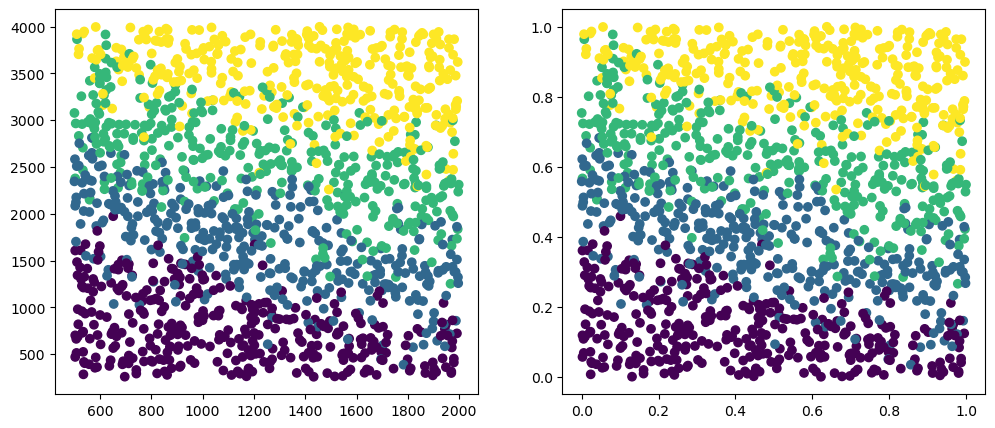

In [29]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))

a1.scatter(x_train["battery_power"],x_train["ram"],c=y_train)

a2.scatter(x_train_normalize["battery_power"],x_train_normalize["ram"],c=y_train)


# LINEAR REGRESSION


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train_normalize,y_train)

LinearRegression()

In [33]:
y_pred=lr.predict(x_test_normalize)

In [34]:
y_pred

array([ 0.34991904,  1.88060849,  1.11586845,  3.0353554 ,  0.96298511,
        1.50786374,  1.98118803,  0.38457041,  2.34307216,  1.10352992,
        0.12601992,  0.7829905 ,  1.59575315,  2.85032133,  1.94033619,
        1.92506874,  3.24592096,  3.45610884,  1.059331  , -0.04685309,
        0.29695068,  1.29261725,  0.82958125,  1.58295736,  0.50711317,
        0.74925829,  2.62869283,  2.00548393,  2.09474001, -0.26279741,
        0.56819048, -0.25057081,  3.24272282,  0.40218956,  1.33376697,
        1.28211726,  2.39573706,  0.12158573,  3.14869372,  0.14243004,
        1.80136463,  2.35675799,  1.73557705, -0.3242632 ,  2.43151882,
        1.98659647,  1.57427967,  1.19124928,  2.78995611,  0.75393711,
        2.82036433,  1.17610062, -0.00436767,  0.35488311,  0.85636714,
        0.88208099,  0.93942241,  2.08966158, -0.3475272 , -0.34538915,
        0.08611461,  3.11702125,  2.59223355,  1.33098827,  0.50911062,
        0.55459199,  3.48820748,  2.84177622,  1.2541184 ,  1.36

In [35]:
from sklearn.metrics import r2_score,accuracy_score

In [36]:
ACC=r2_score(y_test,y_pred)

In [37]:
ACC

0.8745154593694466

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
Y_pred=lr.predict(x_test)

In [40]:
Acc=r2_score(y_test,Y_pred)
Acc

0.8745154593694466